In [1]:
#| Concept                | Description                    |
#| ---------------------- | ------------------------------ |
#| **Mean**               | Average of the data            |
#| **Median**             | Middle value                   |
#| **Mode**               | Most frequent value            |
#| **Range**              | Difference between max and min |
#| **Variance**           | How spread out the data is     |
#yes| **Standard Deviation** | Average distance from the mean |



import statistics as stats
from collections import Counter

# Example datasets
data_odd = [2, 4, 6, 8, 10]
data_even = [2, 4, 6, 8]
data_multimode = [1, 2, 2, 3, 3, 4]
data_unique = [1, 2, 3, 4]

# Median
print("Median (odd):", stats.median(data_odd))       # Output: 6
print("Median (even):", stats.median(data_even))     # Output: 5.0

# Mode using statistics (note: throws error if no mode exists)
try:
    print("Mode (multi):", stats.mode(data_multimode))  # Output: 2 (first mode found)
except:
    print("No single mode found")

# Handling multiple modes using Counter (manual method)
def find_all_modes(data):
    freq = Counter(data)
    max_count = max(freq.values())
    return [k for k, v in freq.items() if v == max_count]

print("All modes (multi):", find_all_modes(data_multimode))  # Output: [2, 3]
print("All modes (unique):", find_all_modes(data_unique))    # Output: [1, 2, 3, 4] — no repetition


Median (odd): 6
Median (even): 5.0
Mode (multi): 2
All modes (multi): [2, 3]
All modes (unique): [1, 2, 3, 4]


In [2]:
# Mean, Median, Mode, Range, Variance, Standard Deviation
import numpy as np
import statistics as stats
from collections import Counter

# Sample data
data = [2, 4, 6, 6, 8, 10, 12]

# Convert to NumPy array for math operations
data_np = np.array(data)

# Mean
mean = np.mean(data_np)

# Median
median = np.median(data_np)

# Mode (handles multimodal)
def find_modes(data):
    freq = Counter(data)
    max_count = max(freq.values())
    return [k for k, v in freq.items() if v == max_count]

modes = find_modes(data)

# Range
data_range = np.max(data_np) - np.min(data_np)

# Variance (population & sample)
population_variance = np.var(data_np)
sample_variance = np.var(data_np, ddof=1)  # ddof=1 for sample

# Standard Deviation (population & sample)
population_std = np.std(data_np)
sample_std = np.std(data_np, ddof=1)

# Results
print(f"Data: {data}")
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode(s): {modes}")
print(f"Range: {data_range}")
print(f"Population Variance: {population_variance}")
print(f"Sample Variance: {sample_variance}")
print(f"Population Std Dev: {population_std}")
print(f"Sample Std Dev: {sample_std}")


Data: [2, 4, 6, 6, 8, 10, 12]
Mean: 6.857142857142857
Median: 6.0
Mode(s): [6]
Range: 10
Population Variance: 10.122448979591837
Sample Variance: 11.80952380952381
Population Std Dev: 3.1815796359028696
Sample Std Dev: 3.4364987719368982


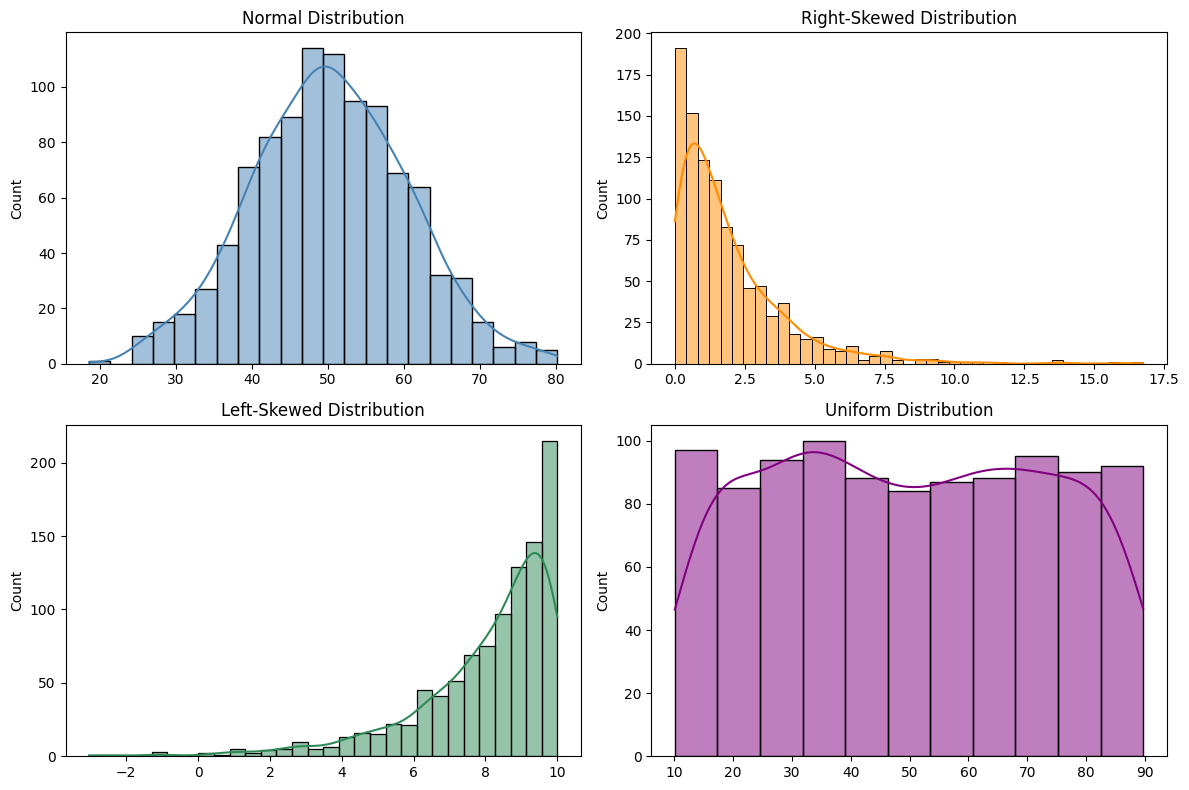

In [6]:
#Normal Distribution (Gaussian)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Normal distribution (loc -> mean, scale -> std_deviation)
normal_data = np.random.normal(loc=50, scale=10, size=1000)

# 2. Right-skewed distribution (exponential)
right_skewed = np.random.exponential(scale=2, size=1000)

# 3. Left-skewed distribution (mirror of right-skewed)
left_skewed = -np.random.exponential(scale=2, size=1000) + 10

# 4. Uniform distribution
uniform_data = np.random.uniform(low=10, high=90, size=1000)

# Plot
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

#kde=true meana density curve
sns.histplot(normal_data, kde=True, ax=axs[0, 0], color='steelblue')
axs[0, 0].set_title("Normal Distribution")

sns.histplot(right_skewed, kde=True, ax=axs[0, 1], color='darkorange')
axs[0, 1].set_title("Right-Skewed Distribution")

sns.histplot(left_skewed, kde=True, ax=axs[1, 0], color='seagreen')
axs[1, 0].set_title("Left-Skewed Distribution")

sns.histplot(uniform_data, kde=True, ax=axs[1, 1], color='purple')
axs[1, 1].set_title("Uniform Distribution")

plt.tight_layout()
plt.show()


In [7]:
#Covariance and correlation
import numpy as np

# Data
study_hours = np.array([2, 3, 4, 5, 6])
test_scores = np.array([65, 70, 75, 80, 85])

# Covariance matrix
cov_matrix = np.cov(study_hours, test_scores)
print("Covariance Matrix:\n", cov_matrix)
print("Covariance:", cov_matrix[0, 1])  # off-diagonal

# Correlation matrix
corr_matrix = np.corrcoef(study_hours, test_scores)
print("\nCorrelation Matrix:\n", corr_matrix)
print("Correlation:", corr_matrix[0, 1])  # off-diagonal


Covariance Matrix:
 [[ 2.5 12.5]
 [12.5 62.5]]
Covariance: 12.5

Correlation Matrix:
 [[1. 1.]
 [1. 1.]]
Correlation: 1.0


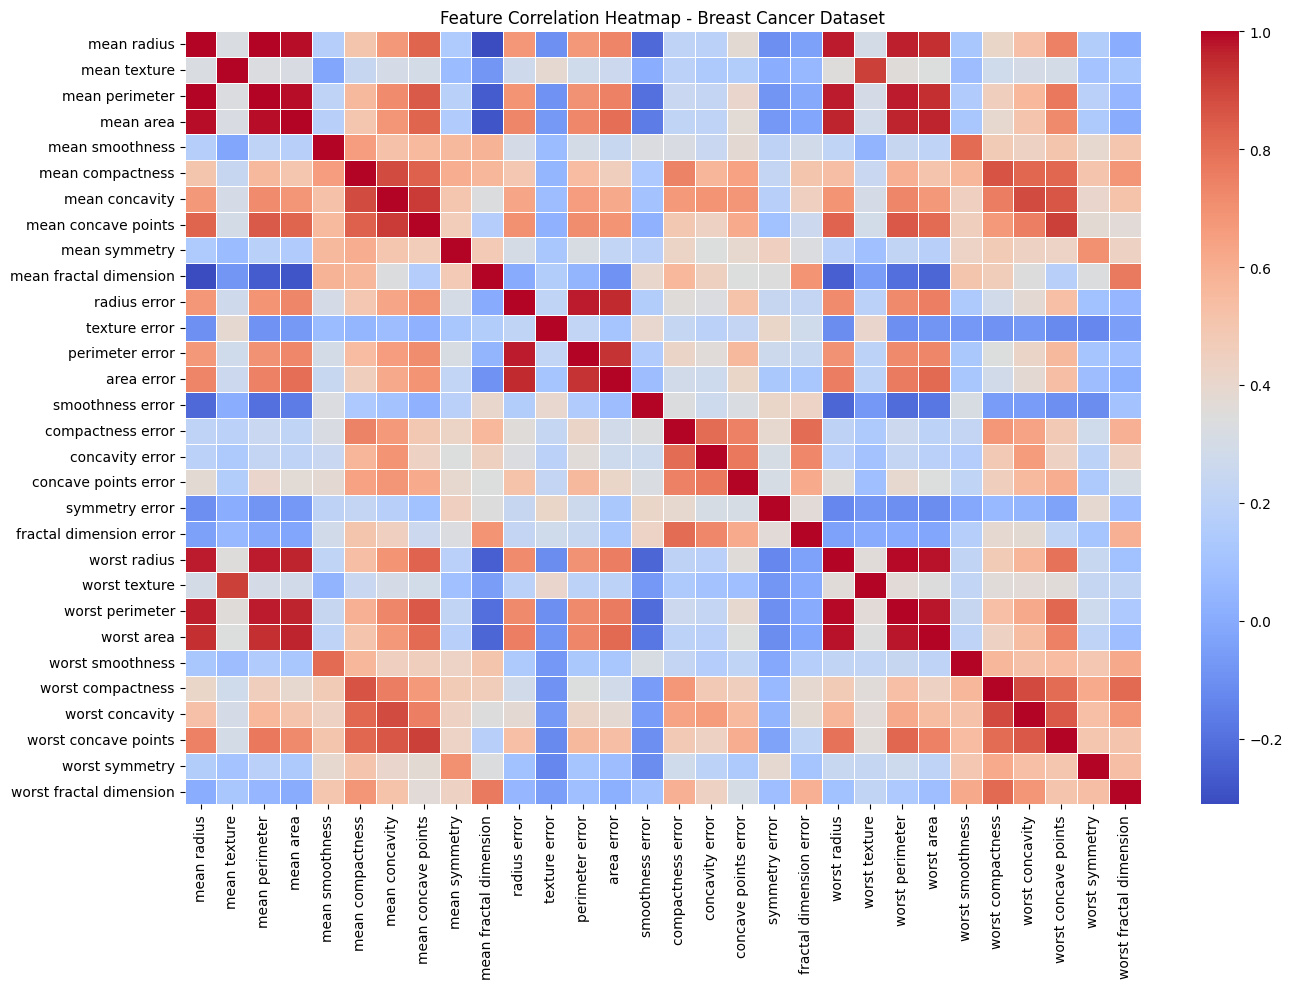

In [8]:
#Covariance and correlation on breastcancer data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap - Breast Cancer Dataset")
plt.tight_layout()
plt.show()


In [9]:
# selecting correlated features and removing unnecessary ones.
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add target column (0 = benign, 1 = malignant)
df['target'] = data.target

# Compute correlation of each feature with target
correlations = df.corr()['target'].drop('target')  # remove target vs target
top_features = correlations.abs().sort_values(ascending=False).head(10)

# Show top features
print("Top 10 features most correlated with cancer diagnosis (malignant):\n")
print(top_features)


Top 10 features most correlated with cancer diagnosis (malignant):

worst concave points    0.793566
worst perimeter         0.782914
mean concave points     0.776614
worst radius            0.776454
mean perimeter          0.742636
worst area              0.733825
mean radius             0.730029
mean area               0.708984
mean concavity          0.696360
worst concavity         0.659610
Name: target, dtype: float64


In [10]:
#Let's now build and train a leaner, smarter neural network using only the top 10 most predictive features we just identified.
#1. Select the top 10 features from correlation
#2.Filter the dataset using only those columns
#3.Split data into train/test
#4.Build and train a neural network (with early stopping)
#5.Evaluate and compare performance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

# Load data
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Step 1: Get top 10 correlated features
correlations = df.corr()['target'].drop('target')
top_10_features = correlations.abs().sort_values(ascending=False).head(10).index.tolist()
print("Top 10 features used:", top_10_features)

# Step 2: Prepare X and y
X = df[top_10_features]
y = df['target']

# Step 3: Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Step 5: Build model
model = Sequential([
    Dense(16, input_shape=(10,), activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Step 7: Train
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stop], verbose=1)

# Step 8: Evaluate
val_preds = (model.predict(X_val) > 0.5).astype(int)

print("\nConfusion Matrix:\n", confusion_matrix(y_val, val_preds))
print("\nClassification Report:\n", classification_report(y_val, val_preds))


Top 10 features used: ['worst concave points', 'worst perimeter', 'mean concave points', 'worst radius', 'mean perimeter', 'worst area', 'mean radius', 'mean area', 'mean concavity', 'worst concavity']
Epoch 1/100


/Users/asgupta6/code/cisco/storm-eng/SensitiveInfoScanner-Ashish/tf-env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6053 - loss: 0.7002 - val_accuracy: 0.6228 - val_loss: 0.6030
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6285 - loss: 0.5892 - val_accuracy: 0.6491 - val_loss: 0.5139
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6857 - loss: 0.5248 - val_accuracy: 0.7719 - val_loss: 0.4404
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8048 - loss: 0.4501 - val_accuracy: 0.8860 - val_loss: 0.3795
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8449 - loss: 0.3912 - val_accuracy: 0.9123 - val_loss: 0.3266
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8759 - loss: 0.3307 - val_accuracy: 0.9211 - val_loss: 0.2788
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9054 - loss: 0.2857 - val_accuracy: 0.9386 - val_loss: 0.2375
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8999 - loss: 0.2795 - val_accuracy: 0.9561 - val_loss: 0.

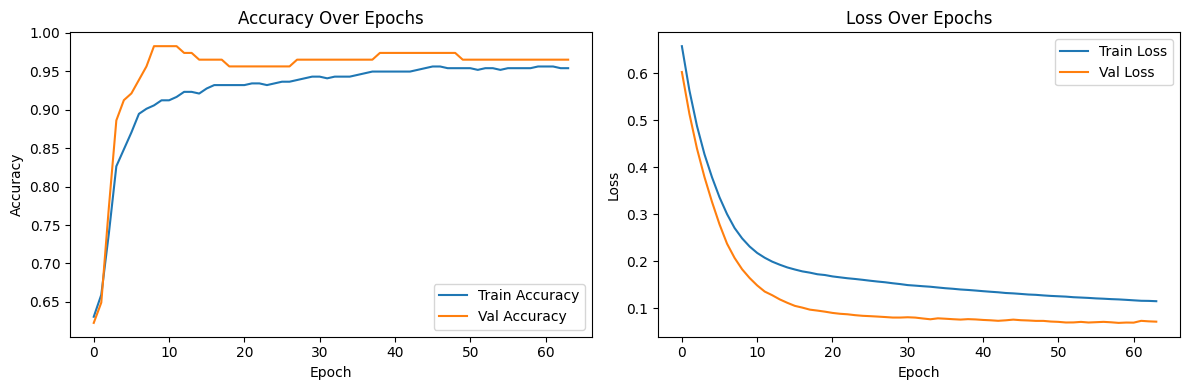

In [11]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


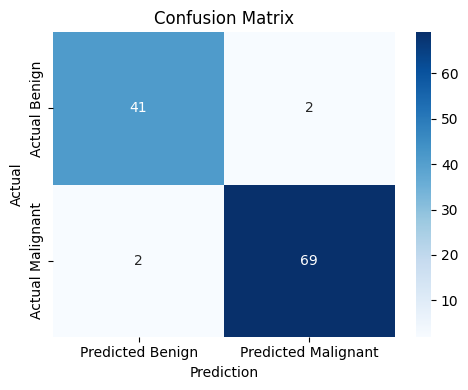

In [12]:
# Confusion matrix heatmap
import seaborn as sns
cm = confusion_matrix(y_val, val_preds)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Benign', 'Predicted Malignant'],
            yticklabels=['Actual Benign', 'Actual Malignant'])

plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


In [14]:
#Sampling and bias.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Check class distribution in full dataset
print("Original class distribution:")
print(y.value_counts(normalize=True))

# Perform stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check class distribution in train and test sets
print("\nTrain class distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest class distribution:")
print(y_test.value_counts(normalize=True))


Original class distribution:
1    0.627417
0    0.372583
Name: proportion, dtype: float64

Train class distribution:
1    0.626374
0    0.373626
Name: proportion, dtype: float64

Test class distribution:
1    0.631579
0    0.368421
Name: proportion, dtype: float64


In [15]:
#Hypothesis
from scipy.stats import ttest_ind

# Group A: Studied less
group_a = [65, 70, 68, 72, 66]

# Group B: Studied more
group_b = [78, 82, 80, 85, 79]

# Run independent t-test
t_stat, p_val = ttest_ind(group_a, group_b)

print("t-statistic:", t_stat)
print("p-value:", p_val)

# Conclusion
if p_val < 0.05:
    print("✅ Reject H₀ — the difference is statistically significant.")
else:
    print("❌ Do not reject H₀ — no significant difference.")


t-statistic: -7.065729141559755
p-value: 0.00010551027988752021
✅ Reject H₀ — the difference is statistically significant.


In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from statsmodels.stats.contingency_tables import mcnemar
import warnings
warnings.filterwarnings('ignore')

# 1. Load and split data
data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 3. Model A (Logistic Regression)
model_a = LogisticRegression()
model_a.fit(X_train_scaled, y_train)
preds_a = model_a.predict(X_val_scaled)

# 4. Model B (Simple NN)
model_b = Sequential([
    Dense(16, input_shape=(30,), activation='relu'),
    Dense(1, activation='sigmoid')
])
model_b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_b.fit(X_train_scaled, y_train, epochs=10, verbose=0)
preds_b = (model_b.predict(X_val_scaled) > 0.5).astype(int).flatten()

# 5. McNemar’s Test setup
b_correct, a_correct = preds_b == y_val, preds_a == y_val
both_disagree = preds_a != preds_b

# Contingency table
#        B correct    B wrong
# A correct   [a&b correct, a correct & b wrong]
# A wrong     [a wrong & b correct, a&b wrong]
table = np.zeros((2, 2))

for i in range(len(y_val)):
    a = a_correct[i]
    b = b_correct[i]
    table[int(not a)][int(not b)] += 1

# McNemar’s Test
result = mcnemar(table, exact=True)
print("Contingency Table:\n", table)
print(f"p-value: {result.pvalue:.4f}")

if result.pvalue < 0.05:
    print("✅ Statistically significant difference between models.")
else:
    print("❌ No statistically significant difference between models.")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Contingency Table:
 [[107.   4.]
 [  2.   1.]]
p-value: 0.6875
❌ No statistically significant difference between models.


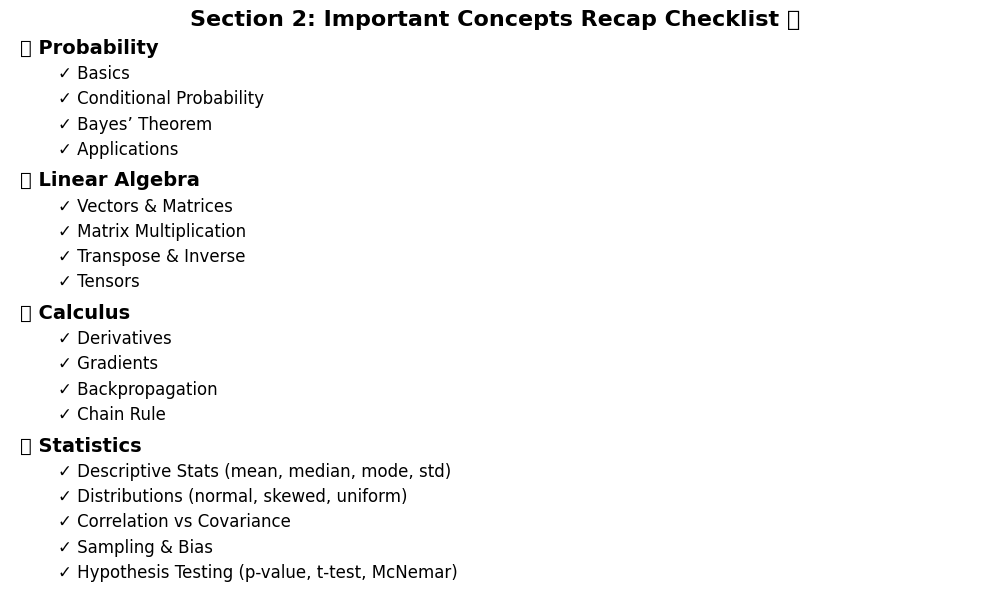

In [18]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

# Topics and subtopics from Section 2
sections = {
    "Probability": ["Basics", "Conditional Probability", "Bayes’ Theorem", "Applications"],
    "Linear Algebra": ["Vectors & Matrices", "Matrix Multiplication", "Transpose & Inverse", "Tensors"],
    "Calculus": ["Derivatives", "Gradients", "Backpropagation", "Chain Rule"],
    "Statistics": [
        "Descriptive Stats (mean, median, mode, std)", 
        "Distributions (normal, skewed, uniform)",
        "Correlation vs Covariance",
        "Sampling & Bias",
        "Hypothesis Testing (p-value, t-test, McNemar)"
    ]
}

# Create a checklist-style visual
fig, ax = plt.subplots(figsize=(10, 8))
y = 1.0
spacing = 0.08
check_mark = u'\u2713'

ax.axis('off')
ax.set_title("Section 2: Important Concepts Recap Checklist ✅", fontsize=16, weight='bold', pad=20)

for topic, subtopics in sections.items():
    ax.text(0.01, y, f"📘 {topic}", fontsize=14, weight='bold')
    y -= spacing
    for item in subtopics:
        ax.text(0.05, y, f"{check_mark} {item}", fontsize=12)
        y -= spacing
    y -= 0.02  # extra space between sections

plt.tight_layout()
plt.show()
